# ex1

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    """载入数据。"""
    xys = []
    with open(filename, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split()))
        xs, ys = zip(*xys)
        return np.asarray(xs), np.asarray(ys)

In [6]:
def identity_basis(x):
    ret = np.expand_dims(x, axis=1)
    return ret

def multinomial_basis(x, feature_num=10):
    x = np.expand_dims(x, axis=1)
    feat = [x]
    for i in range(2, feature_num + 1):
        feat.append(x ** i)  # pow(x, i)
    ret = np.concatenate(feat, axis=1)
    return ret

def gaussian_basis(x, feature_num=10):
    miu = np.linspace(0, 25, feature_num)
    sigma = 1.0 * (centers[1] - centers[0])
    x = np.expand_dims(x. axis - 1)
    x = np.concatenate([x] * feature_num, axis=1)

    out = (x - centers) / width
    ret = np.exp(-0.5 * out ** 2)
    return ret

In [7]:
def main(x_train, y_train):
    basis_func = identity_basis
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1)
    phi1 = basis_func(x_train)
    phi = np.concatenate([phi0, phi1], axis=1)

    # OLS
    ols_w = np.dot(np.linalg.pinv(phi), y_train)

    # gradient descent
    gd_w = np.zeros(phi.shape[1])
    lr = 0.001
    max_iter = 10000
    for i in range(max_iter):
        grad = phi.T.dot(phi.dot(gd_w) - y_train) * 2.0 / len(phi)
        gd_w = gd_w - lr * grad

    def f(x, ols=True):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = basis_func(x)
        phi = np.concatenate([phi0, phi1], axis=1)
        if ols:
            y = np.dot(phi, ols_w)
        else:
            y = np.dot(phi, gd_w)
        return y
    return f


(300,)
(200,)
训练集预测值与真实值的标准差：2.0
预测值与真实值的标准差：2.2


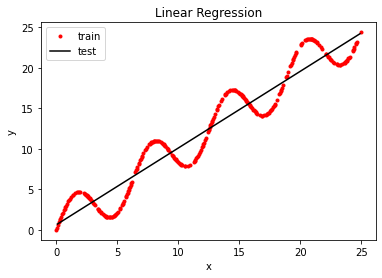

In [8]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)

    # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
    f = main(x_train, y_train)

    y_train_pred = f(x_train)
    std = evaluate(y_train, y_train_pred)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))
    
    # 计算预测的输出值
    y_test_pred = f(x_test, True)
    # 使用测试集评估模型
    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
#     plt.plot(x_test, y_test, 'k')
    plt.plot(x_test, y_test_pred, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'pred'])
    plt.show()

预测值与真实值的标准差：2.2


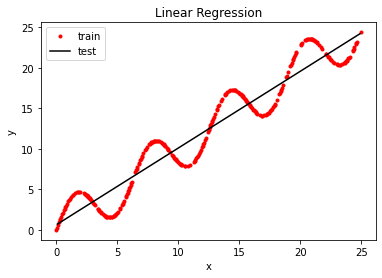

In [9]:
y_test_pred = f(x_test, False)
# 使用测试集评估模型
std = evaluate(y_test, y_test_pred)
print('预测值与真实值的标准差：{:.1f}'.format(std))

#显示结果
plt.plot(x_train, y_train, 'ro', markersize=3)
#     plt.plot(x_test, y_test, 'k')
plt.plot(x_test, y_test_pred, 'k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend(['train', 'test', 'pred'])
plt.show()

# ex2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def identity_basis(x):
    ret = np.expand_dims(x, axis=1)
    return ret

def multinomial_basis(x, feature_num=10):
    x = np.expand_dims(x, axis=1) # shape(N, 1)
    feat = [x]
    for i in range(2, feature_num+1):
        feat.append(x**i)
    ret = np.concatenate(feat, axis=1)
    return ret

def gaussian_basis(x, feature_num=10):
    centers = np.linspace(0, 25, feature_num)
    width = 1.0 * (centers[1] - centers[0])
    x = np.expand_dims(x, axis=1)
    x = np.concatenate([x]*feature_num, axis=1)
    
    out = (x-centers)/width
    ret = np.exp(-0.5 * out ** 2)
    return ret

def load_data(filename, basis_func=gaussian_basis):
    """载入数据。"""
    xys = []
    with open(filename, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split()))
        xs, ys = zip(*xys)
        xs, ys = np.asarray(xs), np.asarray(ys)
        
        o_x, o_y = xs, ys
        phi0 = np.expand_dims(np.ones_like(xs), axis=1)
        phi1 = basis_func(xs)
        xs = np.concatenate([phi0, phi1], axis=1)
        return (np.float32(xs), np.float32(ys)), (o_x, o_y)

In [2]:
import tensorflow as tf
from tensorflow.keras import optimizers, layers, Model

class linearModel(Model):
    def __init__(self, ndim):
        super(linearModel, self).__init__()
        self.w = tf.Variable(
            shape=[ndim, 1], 
            initial_value=tf.random.uniform(
                [ndim,1], minval=-0.1, maxval=0.1, dtype=tf.float32))
        
    @tf.function
    def call(self, x):
        y = tf.squeeze(tf.matmul(x, self.w), axis=1)
        return y

(xs, ys), (o_x, o_y) = load_data('train.txt')        
ndim = xs.shape[1]

model = linearModel(ndim=ndim)

In [3]:
optimizer = optimizers.Adam(0.1)
@tf.function
def train_one_step(model, xs, ys):
    with tf.GradientTape() as tape:
        y_preds = model(xs)
        loss = tf.reduce_mean(tf.sqrt(1e-12+(ys-y_preds)**2))
    grads = tape.gradient(loss, model.w)
    optimizer.apply_gradients([(grads, model.w)])
    return loss

@tf.function
def predict(model, xs):
    y_preds = model(xs)
    return y_preds

def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std


loss is 11.77
loss is 1.656
loss is 1.609
loss is 1.573
loss is 1.535
loss is 1.496
loss is 1.455
loss is 1.414
loss is 1.369
loss is 1.323
训练集预测值与真实值的标准差：1.5
训练集预测值与真实值的标准差：1.8


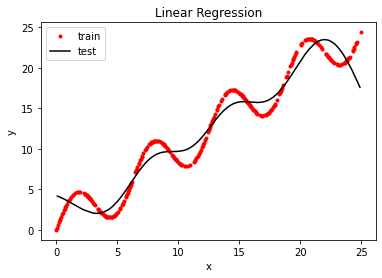

In [4]:
for i in range(1000):
    loss = train_one_step(model, xs, ys)
    if i % 100 == 1:
        print(f'loss is {loss:.4}')
        
        
y_preds = predict(model, xs)
std = evaluate(ys, y_preds)
print('训练集预测值与真实值的标准差：{:.1f}'.format(std))

(xs_test, ys_test), (o_x_test, o_y_test) = load_data('test.txt')

y_test_preds = predict(model, xs_test)
std = evaluate(ys_test, y_test_preds)
print('训练集预测值与真实值的标准差：{:.1f}'.format(std))

plt.plot(o_x, o_y, 'ro', markersize=3)
plt.plot(o_x_test, y_test_preds, 'k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend(['train', 'test', 'pred'])
plt.show()